## Import necessary modules
Run this cell before running any other cells

<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

In [21]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-02-20 05:13:30,120 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:42:f5:78:8d:49
2024-02-20 05:13:32,768 | INFO     |: Connected to c0:42:f5:78:8d:49


In [22]:
times = []
pitches = []
rolls = []
yaw = []
lp_pitches = []
lp_rolls = []
gpitch = []
groll = []
gyaw = []
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

['-2.136', '1.298', '2.450', '0.534', '0.511', '112668.0']
['-3.2', '1.100', '2.274', '0.740', '1.656', '112675.0']
['-2.792', '1.835', '0.893', '1.496', '4.618', '112677.0']
['-2.823', '1.113', '1.190', '0.229', '0.366', '112680.0']
['-2.895', '0.992', '-1.351', '0.641', '-2.511', '112682.0']
['-2.577', '0.434', '0.106', '2.259', '-1.175', '112687.0']
['-2.117', '1.845', '0.809', '1.717', '-2.984', '112689.0']
['-2.703', '1.649', '2.183', '-3.30', '0.961', '112692.0']
['-2.766', '1.546', '0.366', '2.488', '0.587', '112695.0']
['-2.965', '0.762', '2.259', '0.236', '-1.198', '112698.0']
['-2.586', '2.96', '1.969', '-2.625', '0.832', '112701.0']
['-2.221', '1.17', '3.129', '0.511', '0.99', '112703.0']
['-2.707', '1.218', '0.488', '-1.335', '3.625', '112711.0']
['-1.909', '1.371', '0.748', '2.244', '1.61', '112713.0']
['-2.944', '1.621', '2.297', '-2.374', '-3.99', '112717.0']
['-2.829', '0.762', '1.633', '-2.511', '1.38', '112719.0']
['-3.22', '1.539', '1.488', '0.648', '-2.76', '112722.

In [24]:
print(len(times))
print((float(times[len(times)-1]) - float(times[0])))

1500
5433.0


In [20]:
ble.disconnect()

2024-02-20 05:13:27,353 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [20]:
ble.send_command(CMD.ECHO, "echo")

Robot says -> echo :)


In [6]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[->9.0<-]


In [2]:
messages = []
temps = []
times = []
coords = []
pitches = []
rolls = []
yaw = []
lp_pitches = []
lp_rolls = []
gpitch = []
groll = []
gyaw = []
def notification_handler(uuid, byte_array):
    global messages
    global temps
    global times
    global pitches
    global rolls
    global yaw
    global lp_pitches
    global lp_rolls
    global gyaw
    global gpitch
    global groll
    s = ble.bytearray_to_string(byte_array)
    if "@" in s:
        s=s.split("@")
        temps.append(s[0][6:])
        times.append(s[1][6:])
    elif "T:" in s:
        times.append(s[2:])
    elif "LPAcc" in s:
        s = s[5:].split()
        pitches.append(s[0])
        rolls.append(s[1])
        lp_pitches.append(s[2])
        lp_rolls.append(s[3])
        times.append(s[4])
    elif "Acc" in s:
        s = s[3:].split()
        pitches.append(s[0])
        rolls.append(s[1])
        times.append(s[2])
    elif "Gyr" in s:
        s = s[3:].split()
        gpitch.append(s[0])
        groll.append(s[1])
        gyaw.append(s[2])
        times.append(s[3])
    elif "both" in s:
        s = s[4:].split()
        gpitch.append(s[0])
        groll.append(s[1])
        gyaw.append(s[2])
        lp_pitches.append(s[3])
        lp_rolls.append(s[4])
        times.append(s[5])
    elif "Comp" in s:
        s = s[4:].split()
        pitches.append(s[0])
        rolls.append(s[1])
        yaw.append(s[2])
        gpitch.append(s[3])
        groll.append(s[4])
        gyaw.append(s[5])
        times.append(s[6])
    elif "Auto" in s:
        s = s[4:].split()
        pitches.append(s[0])
        rolls.append(s[1])
        gpitch.append(s[2])
        groll.append(s[3])
        gyaw.append(s[4])
        times.append(s[5])
        
    messages.append(s)
    print(s)

In [7]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [11]:
times = []
ble.send_command(CMD.SAMPLE_TIME, "")

T:873924.0
T:873924.0
T:873924.0
T:873924.0
T:873949.0
T:873968.0
T:873968.0
T:873978.0
T:873988.0
T:873988.0
T:873998.0
T:873998.0
T:874008.0
T:874018.0
T:874028.0
T:874028.0
T:874028.0
T:874038.0
T:874055.0
T:874055.0
T:874055.0
T:874073.0
T:874073.0
T:874084.0
T:874084.0
T:874102.0
T:874102.0
T:874102.0
T:874112.0
T:874118.0
T:874128.0
T:874128.0
T:874128.0
T:874146.0
T:874146.0
T:874174.0
T:874174.0
T:874190.0
T:874201.0
T:874201.0
T:874217.0
T:874217.0
T:874230.0
T:874246.0
T:874246.0
T:874267.0
T:874267.0
T:874277.0
T:874292.0
T:874292.0
T:874313.0
T:874313.0
T:874323.0
T:874339.0
T:874355.0
T:874355.0
T:874355.0
T:874365.0
T:874385.0
T:874401.0
T:874401.0
T:874411.0
T:874411.0
T:874428.0
T:874428.0
T:874428.0
T:874445.0
T:874445.0
T:874474.0
T:874474.0
T:874491.0
T:874501.0
T:874501.0
T:874518.0
T:874518.0
T:874535.0
T:874545.0
T:874545.0
T:874562.0
T:874562.0
T:874579.0
T:874589.0
T:874589.0
T:874606.0
T:874626.0
T:874626.0
T:874636.0
T:874636.0
T:874653.0
T:874653.0
T:874653.0

In [12]:
print(len(times))

634


In [13]:
times = []
ble.send_command(CMD.SEND_TIME_DATA, "")

T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450650.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:2450651.0
T:24

In [14]:
print(times)

['2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450650.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0', '2450651.0'

In [ ]:
ble.send_command(CMD.GET_TEMP_READINGS, "")
for i in range(100):
    print(temps[i]+" deg Celsius at "+times[i])

In [8]:
print(times)

['3362053.0', '3362053.0', '3362053.0', '3362054.0', '3362054.0', '3362054.0', '3362054.0', '3362054.0', '3362055.0', '3362055.0', '3362055.0', '3362055.0', '3362056.0', '3362056.0', '3362056.0', '3362056.0', '3362057.0', '3362057.0', '3362057.0', '3362057.0', '3362057.0', '3362059.0', '3362059.0', '3362059.0', '3362059.0', '3362060.0', '3362060.0', '3362060.0', '3362060.0', '3362061.0', '3362061.0', '3362061.0', '3362061.0', '3362061.0', '3362062.0', '3362062.0', '3362062.0', '3362062.0', '3362063.0', '3362063.0', '3362063.0', '3362063.0', '3362064.0', '3362064.0', '3362064.0', '3362064.0', '3362064.0', '3362069.0', '3362069.0', '3362069.0', '3362069.0', '3362070.0', '3362070.0', '3362070.0', '3362070.0', '3362071.0', '3362071.0', '3362071.0', '3362071.0', '3362072.0', '3362072.0', '3362072.0', '3362072.0', '3362072.0', '3362073.0', '3362073.0', '3362073.0', '3362073.0', '3362074.0', '3362074.0', '3362074.0', '3362074.0', '3362074.0', '3362076.0', '3362076.0', '3362076.0', '3362076.0'

In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [20]:
pitches = []
rolls = []
times = []
ble.send_command(CMD.GET_ACCEL_READINGS, "")

['6.673', '0.488', '1200640.0']
['6.451', '0.109', '1200692.0']
['7.200', '0.874', '1200744.0']
['8.58', '0.188', '1200796.0']
['7.701', '0.545', '1200848.0']
['6.999', '0.577', '1200900.0']
['8.115', '0.620', '1200952.0']
['7.553', '0.274', '1201004.0']
['7.431', '0.410', '1201056.0']
['7.410', '0.135', '1201108.0']
['7.761', '0.82', '1201160.0']
['7.296', '0.245', '1201212.0']
['7.706', '0.108', '1201264.0']
['7.698', '0.599', '1201316.0']
['7.799', '0.217', '1201368.0']
['7.135', '0.488', '1201420.0']
['7.482', '0.0', '1201472.0']
['7.696', '0.0', '1201524.0']
['7.610', '0.135', '1201576.0']
['7.562', '0.890', '1201628.0']
['7.175', '0.163', '1201680.0']
['7.932', '0.378', '1201732.0']
['7.546', '0.299', '1201784.0']
['7.812', '0.324', '1201836.0']
['7.316', '0.322', '1201888.0']
['8.412', '0.484', '1201940.0']
['7.665', '0.80', '1201992.0']
['7.541', '0.541', '1202044.0']
['7.277', '0.243', '1202096.0']
['7.598', '0.81', '1202148.0']
['8.507', '0.134', '1202200.0']
['7.385', '0.216

## Disconnect

In [112]:
float(times[999])-float(times[0])

11.989000000000004

In [111]:
pitches = []
rolls = []
times = []
lp_pitches = []
lp_rolls = []
ble.send_command(CMD.LP_ACCEL_READINGS, "")

['0.403', '-1.477', '0.403', '-1.477', '214.184']
['0.479', '-1.64', '0.423', '-1.364', '214.197']
['0.988', '0.320', '0.578', '-1.78', '214.208']
['0.453', '-1.13', '0.544', '-1.61', '214.220']
['0.216', '0.865', '0.335', '-1.7', '214.233']
['0.535', '0.160', '0.390', '0.775', '214.244']
['1.145', '0.692', '0.597', '0.753', '214.257']
['0.136', '0.163', '0.471', '0.502', '214.268']
['0.320', '0.80', '0.430', '0.386', '214.281']
['0.378', '0.674', '0.415', '0.465', '214.292']
['0.454', '-1.42', '0.426', '0.623', '214.304']
['0.535', '0.669', '0.456', '0.635', '214.317']
['1.267', '-1.78', '0.678', '0.757', '214.328']
['0.318', '0.689', '0.579', '0.738', '214.341']
['1.206', '-1.179', '0.751', '0.859', '214.352']
['0.609', '0.132', '0.712', '0.587', '214.365']
['0.774', '0.0', '0.729', '0.426', '214.376']
['0.401', '0.561', '0.639', '0.463', '214.389']
['1.123', '0.26', '0.772', '0.344', '214.401']
['0.319', '0.851', '0.648', '0.483', '214.412']
['0.268', '0.537', '0.544', '0.498', '214

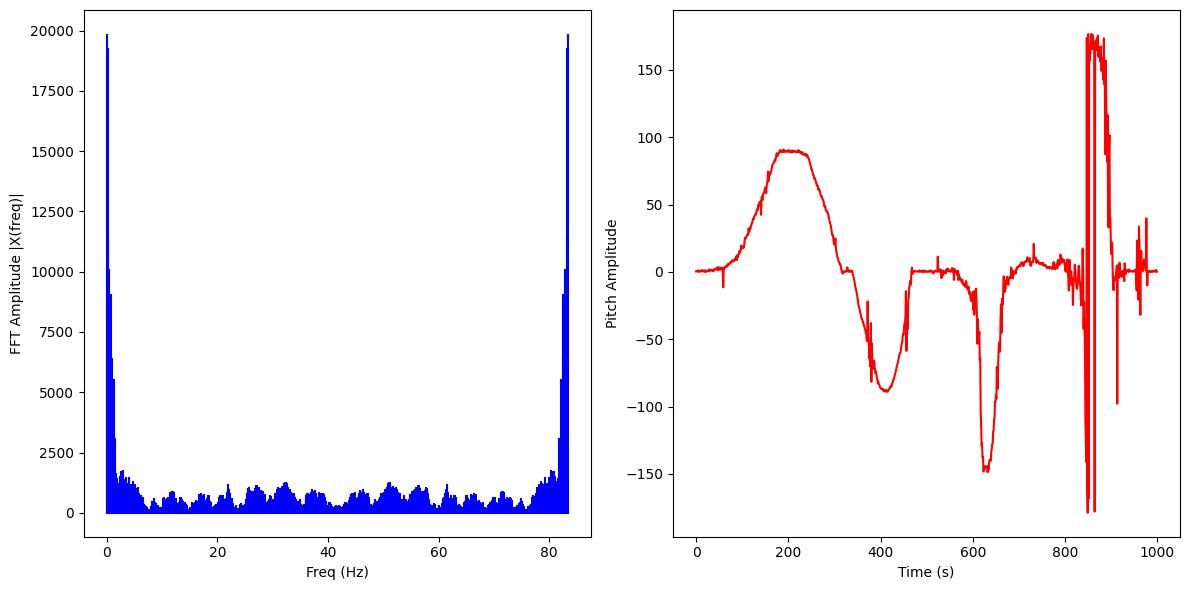

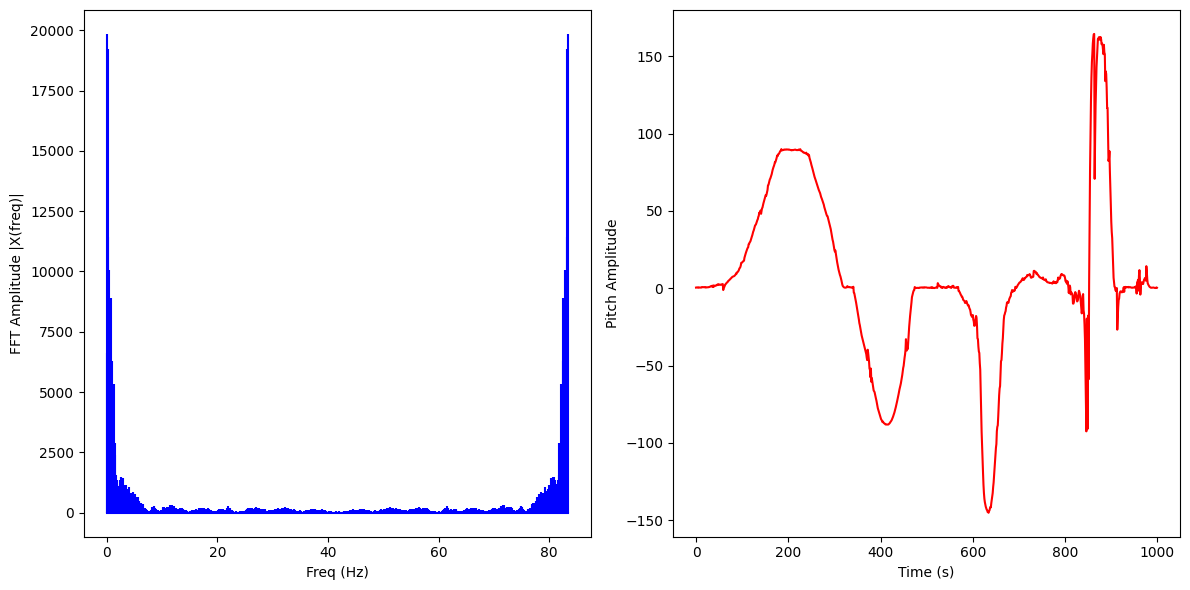

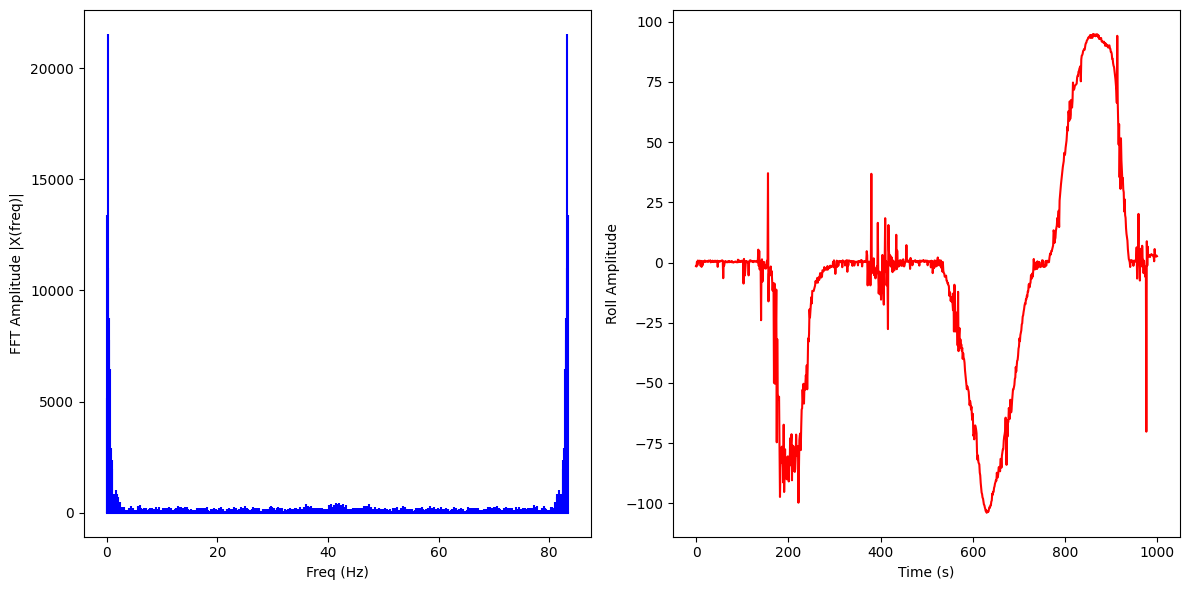

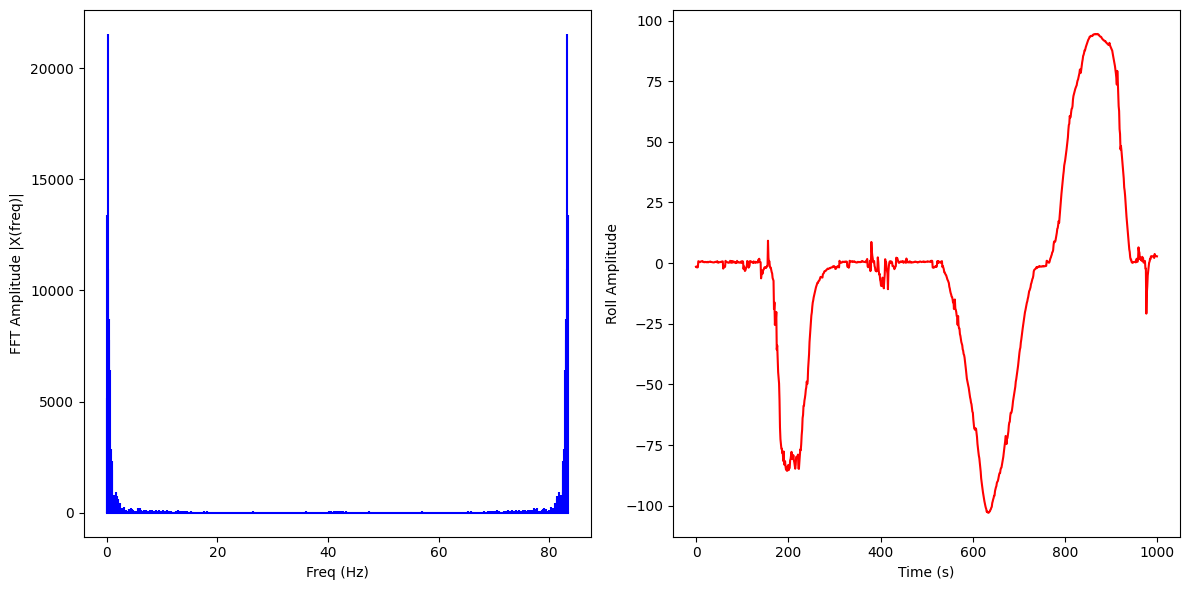

2024-02-20 03:01:06,982 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [116]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
X = fft(pitches)
N = len(pitches)
n = np.arange(N)
T = float(times[999])-float(times[0])
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(len(times)), tmp, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Amplitude')
plt.tight_layout()
plt.show()


X = fft(lp_pitches)
N = len(lp_pitches)
n = np.arange(N)
T = float(times[999])-float(times[0])
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in lp_pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(len(times)), tmp, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Amplitude')
plt.tight_layout()
plt.show()




X = fft(rolls)
N = len(rolls)
n = np.arange(N)
T = float(times[999])-float(times[0])
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in rolls:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(len(times)), tmp, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Roll Amplitude')
plt.tight_layout()
plt.show()


X = fft(lp_rolls)
N = len(lp_rolls)
n = np.arange(N)
T = float(times[999])-float(times[0])
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in lp_rolls:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(len(times)), tmp, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Roll Amplitude')
plt.tight_layout()
plt.show()

ValueError: could not broadcast input array from shape (1000,) into shape (200,)

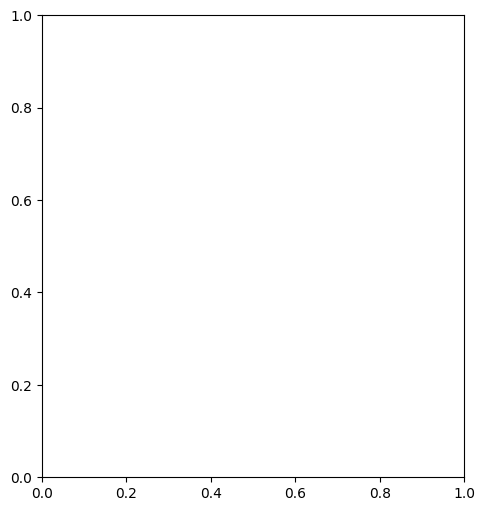

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
X = fft(pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in lp_pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(200), np.abs(ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
print(200/((float(times[199])-float(times[0]))/1000.0))
print(float(times[199])-float(times[0]))

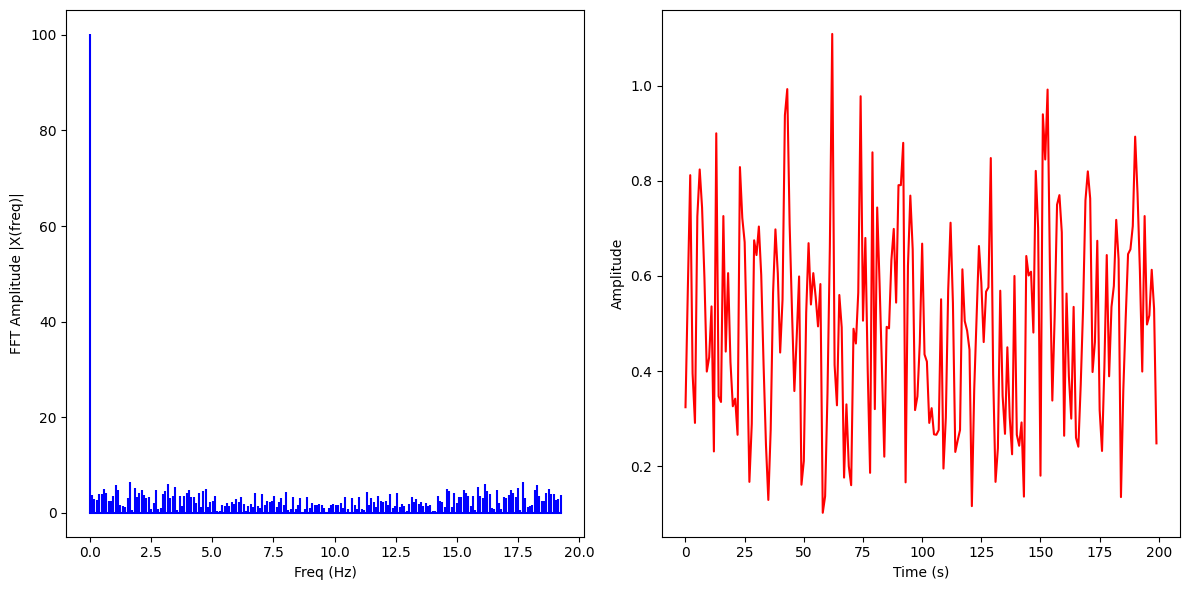

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
X = fft(lp_pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in lp_pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(200), np.abs(ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

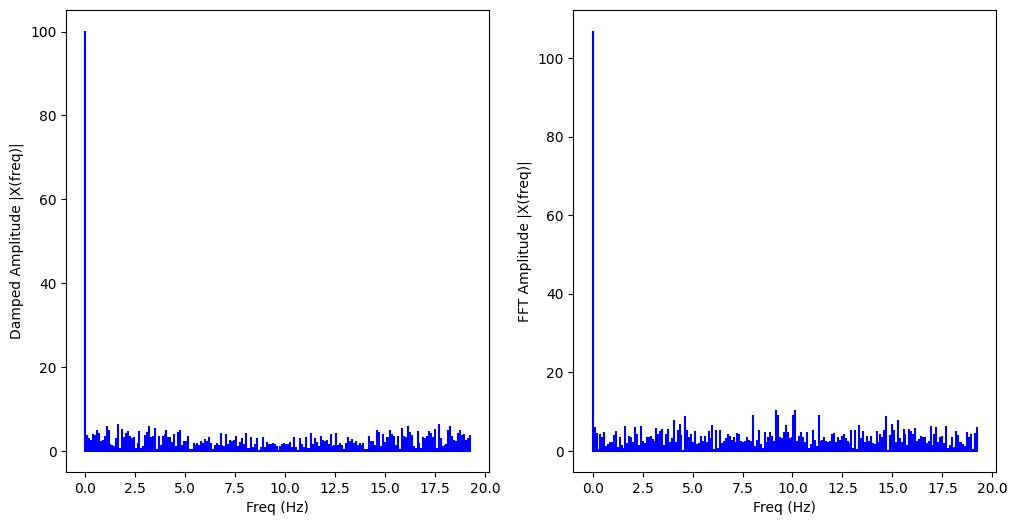

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
LX = fft(lp_pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(LX), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Damped Amplitude |X(freq)|')


X = fft(pitches)
# plt.figure(figsize = (12, 6))
plt.subplot(122)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')


# tmp = []
# for p in lp_pitches:
#     tmp.append(float(p))
# plt.subplot(122)
# plt.plot(range(200), tmp, 'r')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()

In [ ]:
# below is 10 Hz cutoff freq, above is 5Hz?

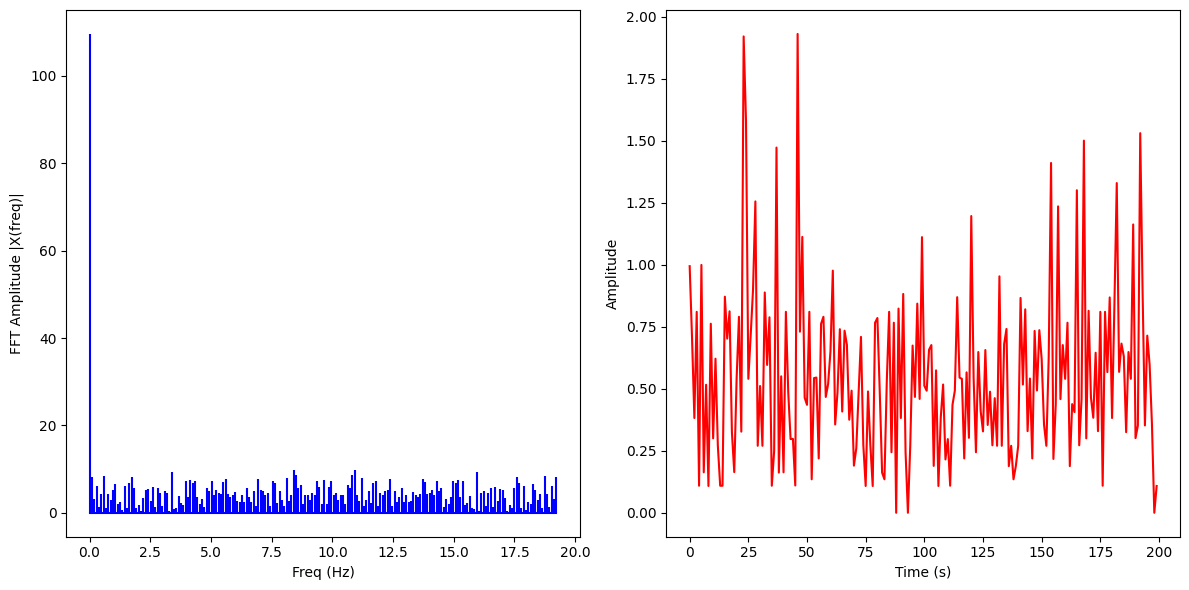

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
X = fft(pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(200), np.abs(ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

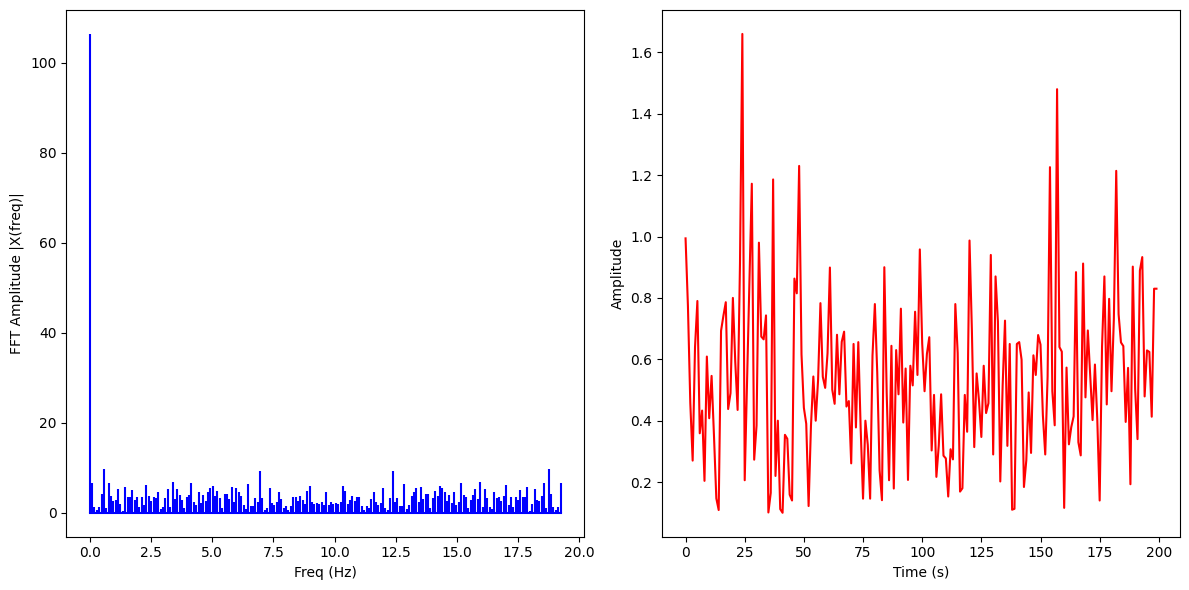

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
X = fft(lp_pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

tmp = []
for p in pitches:
    tmp.append(float(p))
plt.subplot(122)
plt.plot(range(200), np.abs(ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'FFT Amplitude |X(freq)|')

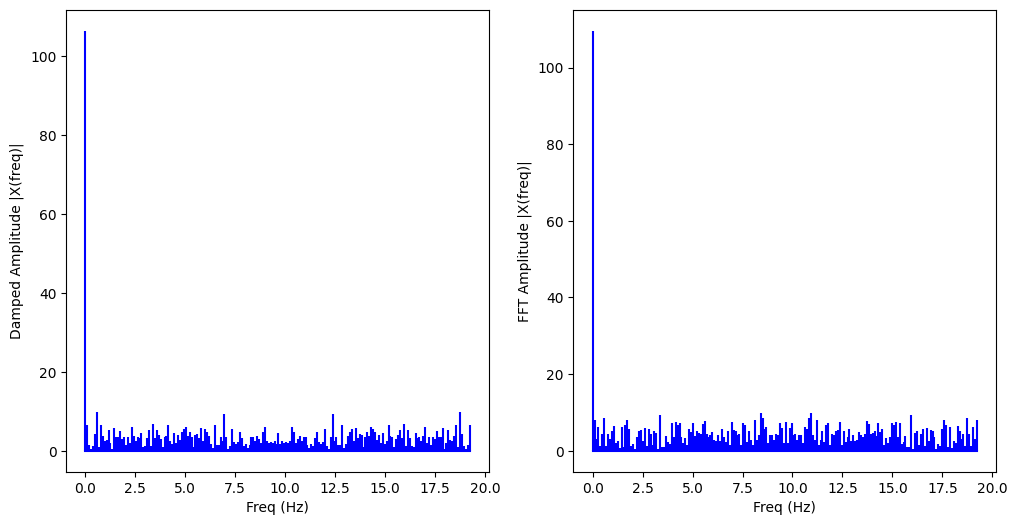

2024-02-12 18:49:11,408 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
LX = fft(lp_pitches)
N = 200
n = np.arange(N)
T = 10.348
freq = n/T
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(LX), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Damped Amplitude |X(freq)|')


X = fft(pitches)
# plt.figure(figsize = (12, 6))
plt.subplot(122)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')


# tmp = []
# for p in lp_pitches:
#     tmp.append(float(p))
# plt.subplot(122)
# plt.plot(range(200), tmp, 'r')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()

In [81]:
pitches = []
rolls = []
gpitch = []
groll = []
gyaw = []
yaw = []
times = []
ble.send_command(CMD.GYRO_READINGS, "")

['3368.441', '1886.327', '1543.358', '1604.603']
['3368.446', '1886.339', '1543.393', '1604.614']
['3368.446', '1886.361', '1543.399', '1604.626']
['3368.439', '1886.368', '1543.403', '1604.639']
['3368.456', '1886.381', '1543.402', '1604.651']
['3368.495', '1886.363', '1543.370', '1604.662']
['3368.506', '1886.358', '1543.372', '1604.675']
['3368.531', '1886.388', '1543.384', '1604.687']
['3368.520', '1886.373', '1543.387', '1604.698']
['3368.553', '1886.391', '1543.376', '1604.711']
['3368.554', '1886.401', '1543.360', '1604.723']
['3368.572', '1886.404', '1543.362', '1604.734']
['3368.553', '1886.391', '1543.366', '1604.746']
['3368.569', '1886.409', '1543.336', '1604.759']
['3368.583', '1886.421', '1543.295', '1604.770']
['3368.600', '1886.424', '1543.276', '1604.782']
['3368.596', '1886.406', '1543.279', '1604.795']
['3368.642', '1886.400', '1543.292', '1604.807']
['3368.630', '1886.416', '1543.290', '1604.818']
['3368.638', '1886.405', '1543.278', '1604.831']
['3368.666', '1886.4

In [82]:
print(float(times[999])-float(times[0]))
print(times[0])
print(times[999])

11.986999999999853
1604.603
1616.590


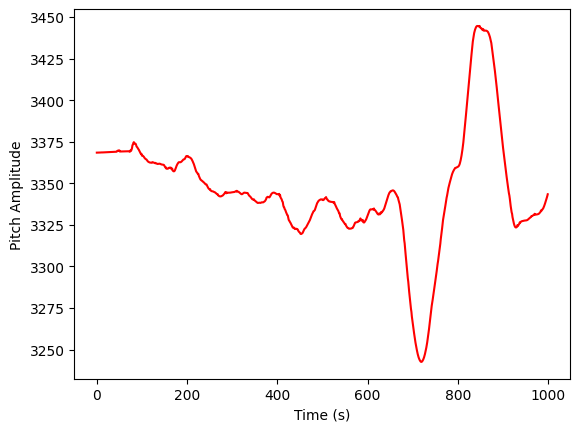

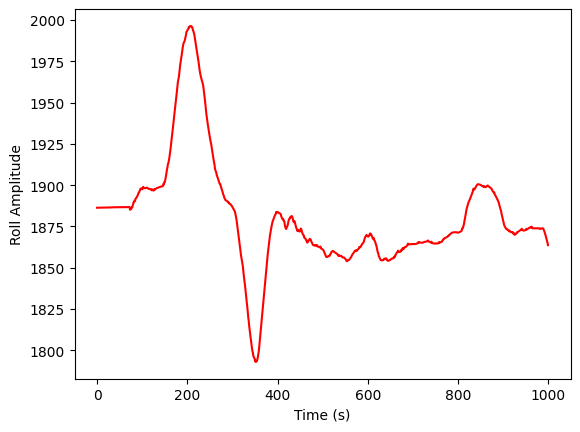

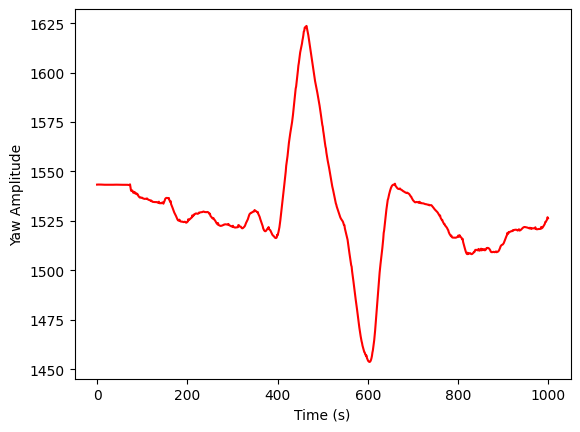

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
gp = []
for p in gpitch:
    gp.append(float(p))
gr = []
for p in groll:
    gr.append(float(p))
gy = []
for p in gyaw:
    gy.append(float(p))
plt.plot(range(1000), gp, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Amplitude')
# plt.yticks([min(gp), max(gp)])
plt.show()
plt.plot(range(1000), gr, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Roll Amplitude')
# plt.yticks([min(gr), max(gr)])
plt.show()
plt.plot(range(1000), gy, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Amplitude')
# plt.yticks([min(gy), max(gy)])
plt.show()

In [82]:
# Disconnect
ble.disconnect()

2024-02-17 17:05:20,534 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [117]:
# After adjusting sampling frequency
lp_pitches = []
lp_rolls = []
gpitch = []
groll = []
gyaw = []
times = []
ble.send_command(CMD.BOTH_READ, "")

['21934.992', '-2708.839', '6904.237', '0.0', '0.0', '2163.768']
['21934.548', '-2708.806', '6904.210', '0.0', '0.0', '2163.794']
['21934.212', '-2708.802', '6904.71', '0.0', '0.1', '2163.822']
['21934.128', '-2708.888', '6903.987', '0.1', '0.0', '2163.849']
['21934.162', '-2708.812', '6904.13', '0.2', '0.0', '2163.875']
['21934.152', '-2709.139', '6903.824', '0.0', '0.4', '2163.903']
['21934.373', '-2710.649', '6902.971', '0.1', '0.8', '2163.929']
['21933.583', '-2713.674', '6901.478', '0.15', '0.0', '2163.957']
['21933.759', '-2719.657', '6899.408', '0.15', '0.12', '2163.983']
['21934.955', '-2724.563', '6898.94', '0.1', '0.14', '2164.10']
['21935.162', '-2729.561', '6897.357', '0.16', '0.14', '2164.38']
['21935.566', '-2733.888', '6896.422', '0.32', '0.10', '2164.64']
['21936.572', '-2736.877', '6894.526', '0.58', '0.1', '2164.92']
['21937.244', '-2739.483', '6893.177', '0.86', '0.7', '2164.118']
['21936.87', '-2742.562', '6892.999', '0.117', '0.2', '2164.145']
['21933.494', '-2745.

In [118]:
print(float(times[199])-float(times[0]))
print(float(times[199])-float(times[0])/200.0)
print(times[199])
print(times[0])

5.373000000000047
2169.141
2163.768


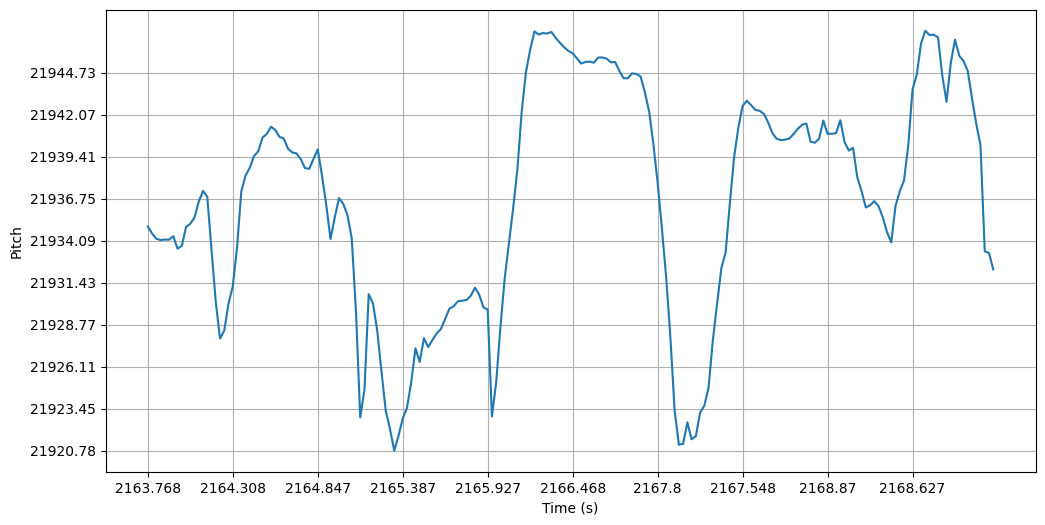

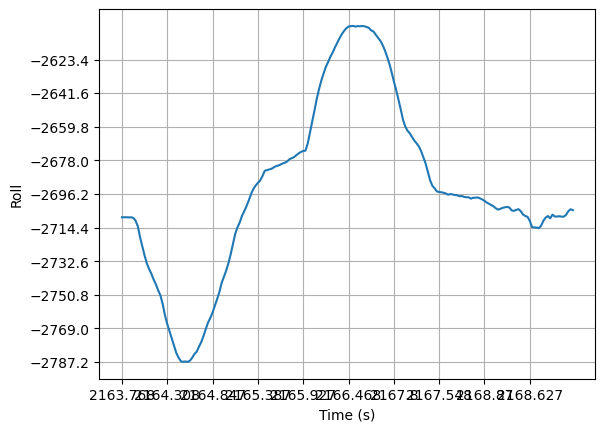

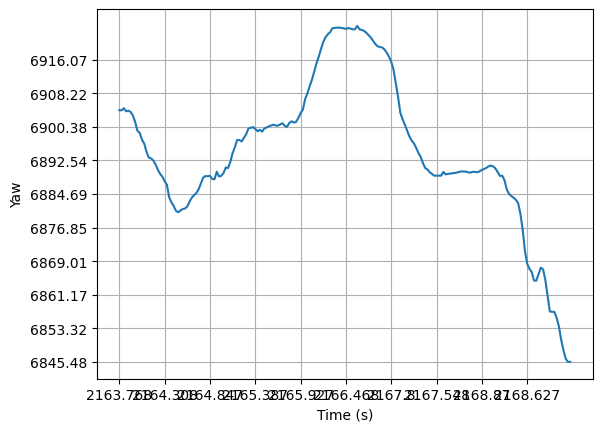

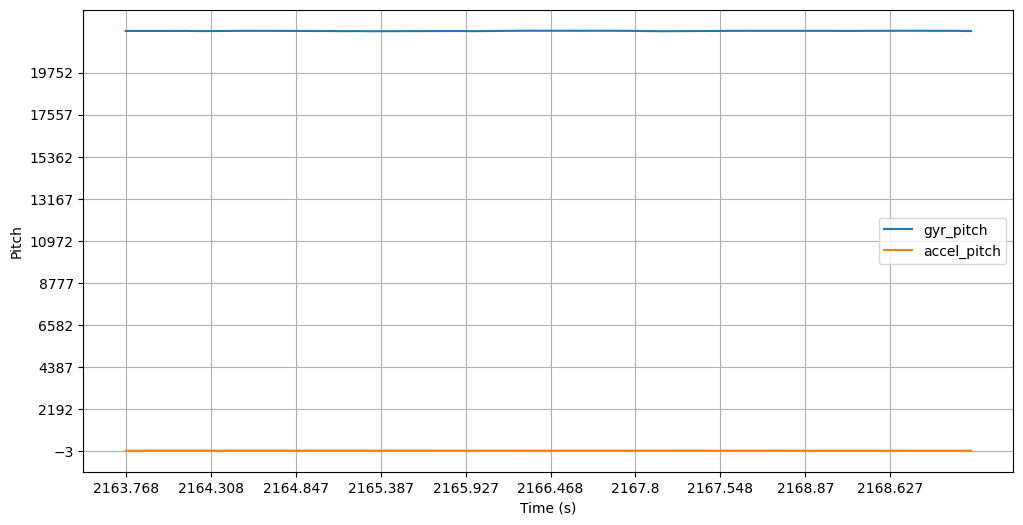

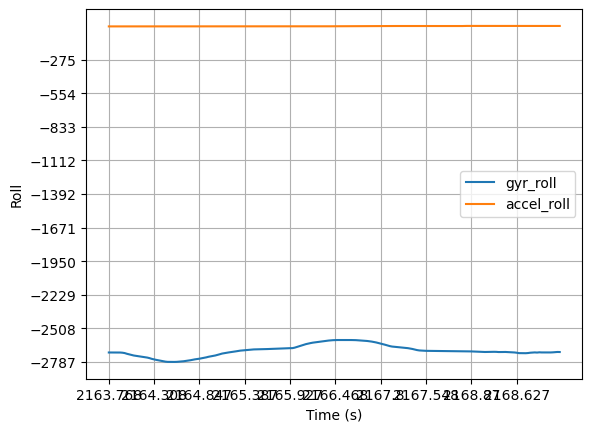

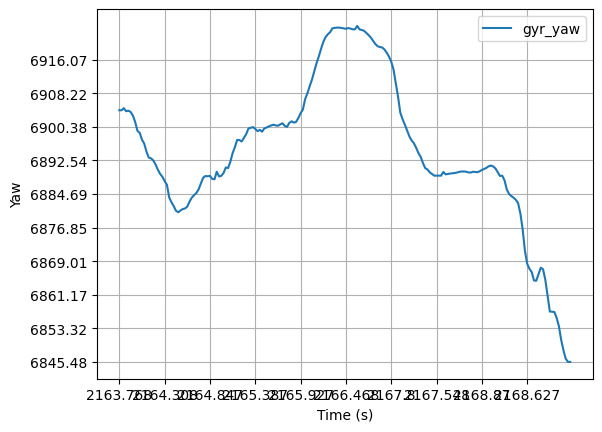

2024-02-18 14:19:16,369 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [119]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
gp = []
gr = []
gy = []
ap = []
ar = []
for g in gpitch:
    gp.append(float(g))
for a in lp_pitches:
    ap.append(float(a))
for g in groll:
    gr.append(float(g))
for a in lp_rolls:
    ar.append(float(a))
for g in gyaw:
    gy.append(float(g))

plt.figure(figsize = (12, 6))
plt.plot(times, gp, label="pitch")
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.yticks(np.arange(min(gp), max(gp), ((max(gp)-min(gp))/10)))
plt.ylabel("Pitch")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()

plt.plot(times, gr, label="roll")
plt.yticks(np.arange(min(gr), max(gr), ((max(gr)-min(gr))/10)))
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.ylabel("Roll")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()

plt.plot(times, gy, label="yaw")
plt.yticks(np.arange(min(gy), max(gy), ((max(gy)-min(gy))/10)))
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.ylabel("Yaw")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize = (12, 6))
plt.plot(times, gp, label="gyr_pitch")
plt.plot(times, ap, label="accel_pitch")
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.yticks(np.arange(min(gp + ap), max(gp + ap), ((max(gp + ap)-min(gp + ap))/10)))
plt.ylabel("Pitch")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(times, gr, label="gyr_roll")
plt.plot(times, ar, label="accel_roll")
plt.yticks(np.arange(min(gr + ar), max(gr + ar), ((max(gr + ar)-min(gr + ar))/10)))
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.ylabel("Roll")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(times, gy, label="gyr_yaw")
plt.yticks(np.arange(min(gy), max(gy), ((max(gy)-min(gy))/10)))
plt.xticks(np.arange(0, 200, (200-0)/10))
plt.ylabel("Yaw")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# After adjusting sampling frequency
pitches = []
rolls = []
yaw = []
gpitch = []
groll = []
gyaw = []
times = []
ble.send_command(CMD.COMPLEMENT_READ, "")

['0.973', '0.264', '0.23', '0.15', '0.6', '0.23', '175.960']
['-1.691', '0.460', '0.15', '0.36', '0.2', '0.15', '175.973']
['-2.23', '0.529', '0.6', '0.50', '0.7', '0.6', '175.985']
['-2.520', '0.447', '0.4', '0.76', '0.1', '0.4', '175.998']
['-2.724', '0.354', '0.10', '0.87', '0.2', '0.10', '176.9']
['-3.13', '0.328', '0.2', '0.83', '0.10', '0.2', '176.22']
['-2.927', '0.628', '0.5', '0.108', '0.4', '0.5', '176.33']
['-2.973', '0.768', '0.3', '0.121', '0.12', '0.3', '176.46']
['-3.109', '0.720', '0.35', '0.110', '0.7', '0.35', '176.57']
['-3.276', '0.524', '0.35', '0.113', '0.12', '0.35', '176.70']
['-3.183', '0.697', '0.33', '0.128', '0.8', '0.33', '176.82']
['-3.197', '0.561', '0.24', '0.147', '0.9', '0.24', '176.93']
['-3.104', '0.688', '0.35', '0.155', '0.10', '0.35', '176.106']
['-3.146', '0.861', '0.53', '0.162', '0.0', '0.53', '176.117']
['-3.338', '0.769', '0.71', '0.158', '0.6', '0.71', '176.130']
['-3.220', '0.665', '0.64', '0.170', '0.44', '0.64', '176.141']
['-3.127', '0.7

In [10]:
print(len(times))
print(float(times[999])-float(times[0]))
print(times[999])
print(times[0])

1000
11.989000000000004
187.949
175.960


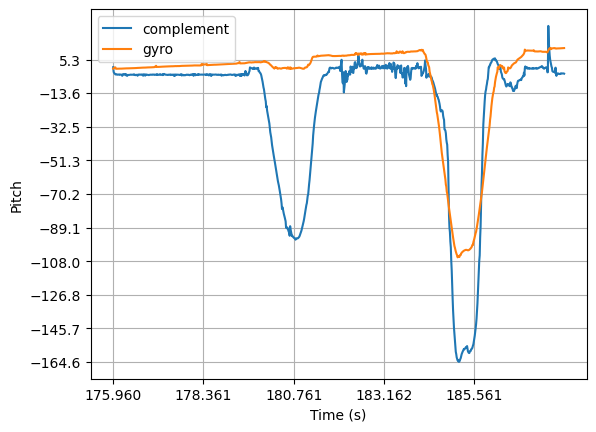

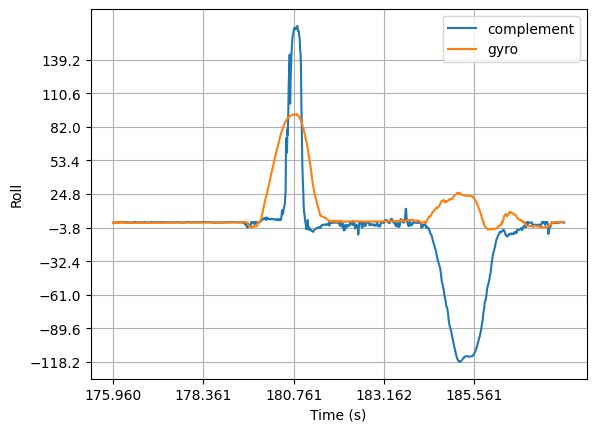

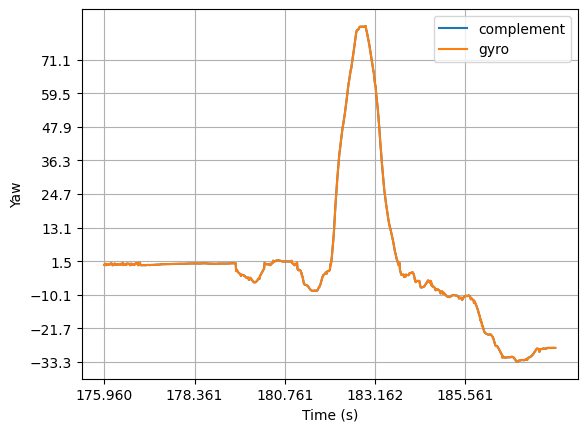

2024-02-20 04:24:47,171 | INFO     |: Disconnected from 2C7E7BE8-D5AB-1F34-3582-913588F90853


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
cp = []
cr = []
cy = []
gp = []
gr = []
gy = []
for g in pitches:
    cp.append(float(g))
for g in rolls:
    cr.append(float(g))
for a in yaw:
    cy.append(float(a))
for g in gpitch:
    gp.append(float(g))
for g in groll:
    gr.append(float(g))
for a in gyaw:
    gy.append(float(a))

plt.plot(times, cp, label="complement")
plt.plot(times, gp, label="gyro")
plt.xticks(np.arange(0, 1000, 200))
plt.yticks(np.arange(min(gp+cp), max(gp+cp), ((max(gp+cp)-min(gp+cp))/10)))
plt.ylabel("Pitch")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(times, cr, label="complement")
plt.plot(times, gr, label="gyro")
plt.yticks(np.arange(min(gr+cr), max(gr+cr), ((max(gr+cr)-min(gr+cr))/10)))
plt.xticks(np.arange(0, 1000, 200))
plt.ylabel("Roll")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(times, cy, label="complement")
plt.plot(times, gy, label="gyro")
plt.yticks(np.arange(min(gy+cy), max(gy+cy), ((max(gy+cy)-min(gy+cy))/10)))
plt.xticks(np.arange(0, 1000, 200))
plt.ylabel("Yaw")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()